### Set up dataframe with all attention maps, human and XAI

In [24]:
import pandas as pd
import numpy as np
import os
import sys

# os.chdir(os.path.dirname(sys.argv[0]))
# print(os.getcwd())

df = pd.read_excel('final_responses_spreadsheet.xlsx')

filtered_df1 = df.filter(regex='^Question ')
filtered_df2 = df.filter(regex='^[0-9]')

n_rows = df.shape[0]
timestamps = []
predictions = []
maps = []
ids =[940, 3073, 6545, 6912, 11360, 12015, 15783, 23413, 24283, 30364, 30625, 32357, 33433, 34789, 41850]
movie_ids = []

for x in range(0, n_rows):
    counter = 0
    id_counter = 0
    for y in filtered_df2.columns:
        a = np.zeros((3,3))
        timestamps.append(df["Timestamp"][x])
        pred = 1 if df[y][x] == "Yes, it is action" else 0
        predictions.append(pred)
        movie_ids.append(ids[id_counter])
        id_counter += 1

        for z in range(0, 3):
            if(type(df[filtered_df1.columns[counter]][x]) == float):
                elementList = []
            else:
                elementList = df[filtered_df1.columns[counter]][x].split()
                for l in elementList:
                    if l == "A," or l == 'A':
                        a[z,0] = 1
                    if l == "B," or l == 'B':
                        a[z,1] = 1
                    if l == "C":
                        a[z,2] = 1
            counter+= 1
        maps.append(a)
            
data = {"Timestamp": timestamps, "Movie ID": movie_ids, "Prediction": predictions, "Map": maps}
df2 = pd.DataFrame(data)

movie_ids2 = []
maps2_0 = []
maps2_1 = []

for id in ids:
    rows_pred_true = df2.loc[(df2["Movie ID"] == id) & (df2["Prediction"] == 1)]
    rows_pred_true2 = rows_pred_true["Map"]

    mean_array_true = np.mean(rows_pred_true2, axis=0)
    normalized_mean_array_true = mean_array_true / np.sum(mean_array_true)

    rows_pred_false = df2.loc[(df2["Movie ID"] == id) & (df2["Prediction"] == 0)]
    rows_pred_false2 = rows_pred_false["Map"]

    mean_array_false = np.mean(rows_pred_false2, axis=0)
    normalized_mean_array_false = mean_array_false / np.sum(mean_array_false)
    
    movie_ids2.append(id)
    maps2_1.append(normalized_mean_array_true)
    maps2_0.append(normalized_mean_array_false)

data2 = {"Movie ID": movie_ids2, "Map_0": maps2_0, "Map_1": maps2_1}
df3 = pd.DataFrame(data2)



### This is the dataframe with average human attention maps:

In [25]:
df3

,Movie ID,Map_0,Map_1
0,940,"[[0.06862745098039216, 0.06862745098039216, 0....","[[0.10714285714285712, 0.03571428571428571, 0...."
1,3073,"[[0.09448818897637794, 0.2992125984251968, 0.0...","[[0.14285714285714285, 0.2857142857142857, 0.0..."
2,6545,"[[0.0, 0.3, 0.0], [0.0, 0.4, 0.0], [0.0, 0.3, ...","[[0.07142857142857142, 0.24025974025974026, 0...."
3,6912,"[[0.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, ...","[[0.0064516129032258064, 0.0064516129032258064..."
4,11360,"[[0.06493506493506494, 0.07792207792207792, 0....","[[0.02898550724637681, 0.08695652173913043, 0...."
5,12015,"[[0.008928571428571428, 0.1875, 0.053571428571...","[[0.0, 0.06666666666666667, 0.1333333333333333..."
6,15783,"[[0.18897637795275588, 0.2125984251968504, 0.3...","[[0.2857142857142857, 0.0, 0.07142857142857142..."
7,23413,"[[0.28025477707006374, 0.29299363057324845, 0....",NaN
8,24283,"[[0.1929824561403509, 0.1754385964912281, 0.07...","[[0.2258064516129032, 0.2258064516129032, 0.12..."
9,30364,"[[0.05970149253731343, 0.26865671641791045, 0....","[[0.12962962962962962, 0.25925925925925924, 0...."


### Load SHAP and Occlusion maps

In [26]:
data_shap = pd.read_pickle('shap_and_occlusion_maps.pickle')
data_shap = data_shap.sort_values(by='id', ascending=True)


data_shap.head()

,id,filename,prediction,true,shap_0,shap_1,occlusion_0,occlusion_1,shap0_3x3,shap1_3x3,occlusion0_3x3,occlusion1_3x3
1,11360,11360 (action).jpg,"[[0.9479071, 0.052092966]]",1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.05346071720123291, 0.05346071720123291, 0....","[[0.946539331227541, 0.946539331227541, 0.9465...","[[0.05989592007799795, 0.0796345784858902, 0.0...","[[0.07497066373278566, 0.009590422744570545, 0...","[[0.1032465774888512, 0.09289446167961958, 0.1...","[[0.11264853032254118, 0.11328322982553381, 0...."
5,12015,12015.jpg,"[[0.001798959, 0.998201]]",0,"[[0.013010783697924208, 0.013010783697924208, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9966468017082661, 0.9966468017082661, 0.99...","[[0.0033531785011291504, 0.0033531785011291504...","[[0.06858183150466983, 0.15175647213983956, 0....","[[0.14247684962771598, 0.056793707394261914, 0...","[[0.11186620467263025, 0.11228162125230515, 0....","[[0.20387077929707403, 0.04449151986368995, 0...."
14,15783,15783.jpg,"[[0.0792462, 0.9207537]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.9497359059751034, 0.9497359059751034, 0.94...","[[0.050264060497283936, 0.050264060497283936, ...","[[0.4310173415329047, 0.17534673478053747, 0.0...","[[0.07682081099453368, 0.07794628730416116, 0....","[[0.11460265601668612, 0.11066514576064863, 0....","[[0.08798361830591055, 0.12601707150265926, 0...."
3,17882,"17882 (action, practice).jpg","[[0.085661165, 0.9143388]]",1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.022495814802976886, 0.022495814802976886, ...","[[0.8868925720453262, 0.8868925720453262, 0.88...","[[0.11310738325119019, 0.11310738325119019, 0....","[[0.09847007347047566, 0.07683119315463223, 0....","[[0.056676037548249694, 0.11161608868597227, 0...","[[0.11315784324692428, 0.11440731828716799, 0....","[[0.1005403553601406, 0.08681034543540889, 0.1..."
8,23413,23413.jpg,"[[0.9596142, 0.0403858]]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.023419457578866203, 0.023419457578866203, ...","[[0.042613208293914795, 0.042613208293914795, ...","[[0.9573868773877621, 0.9573868773877621, 0.95...","[[0.07361201018010101, 0.16123022627351313, 0....","[[0.024168078749839547, 0.014355720170306315, ...","[[0.1107268034156366, 0.21646994285264232, 0.0...","[[0.11216525562472099, 0.10757337426233152, 0...."


## Compute EMD

In [27]:
from scipy.stats import wasserstein_distance

data_shap = pd.read_pickle('shap_and_occlusion_maps.pickle')


emd_human_shap_0 = []
emd_human_shap_1 = []
emd_human_occlusion_0 = []
emd_human_occlusion_1 = []

# control distances to array of equal values for each cell
emd_control_human_0 = []
emd_control_human_1 = []

control_flat_array = np.array([1/9 for i in range(9)])

data_shap = data_shap.drop(3) # remove the "training" poster from the analysis data
data_shap = data_shap.reset_index(drop=True)

data_shap['id'] = data_shap['id'].astype(int)

# Occlusion 0
for i in range(0, 15):
    
    distribution1 = data_shap["occlusion0_3x3"][i]
    distribution2 = df3["Map_0"][i]

    dist1_rowflat = distribution1.flatten(order = 'C')
    dist2_rowflat = distribution2.flatten(order = 'C')

    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)
    
    emd_human_occlusion_0.append(emd)


# Occlusion 1
for i in range(0, 15):
    
    distribution1 = data_shap["occlusion1_3x3"][i]
    distribution2 = df3["Map_1"][i]

    dist1_rowflat = distribution1.flatten(order = 'C')
    dist2_rowflat = distribution2.flatten(order = 'C')

    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)
    
    emd_human_occlusion_1.append(emd)
    

# Shap 0
for i in range(0, 15):
    
    distribution1 = data_shap["shap0_3x3"][i]
    distribution2 = df3["Map_0"][i]

    dist1_rowflat = distribution1.flatten(order = 'C')
    dist2_rowflat = distribution2.flatten(order = 'C')

    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)   
    emd_human_shap_0.append(emd)
    

    


# Shap 1
for i in range(0, 15):
    distribution1 = data_shap["shap1_3x3"][i]
    distribution2 = df3["Map_1"][i]

    dist1_rowflat = distribution1.flatten(order = 'C')
    dist2_rowflat = distribution2.flatten(order = 'C')

    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)
    
    emd_human_shap_1.append(emd)
    
# human 0 to control
    dist1_rowflat = control_flat_array
    distribution2 = df3["Map_0"][i]

    dist2_rowflat = distribution2.flatten(order = 'C')


    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)
    
    emd_control_human_0.append(emd)
    
# human 1 to control
    dist1_rowflat = control_flat_array
    distribution2 = df3["Map_1"][i]

    dist2_rowflat = distribution2.flatten(order = 'C')


    # compute EMD distances
    emd = wasserstein_distance(dist1_rowflat, dist2_rowflat)
    
    emd_control_human_1.append(emd)



data3 = {"id": ids,"Shap_to_Human_0": emd_human_shap_0, "Shap_to_Human_1": emd_human_shap_1,
         "Occlusion_to_Human_0": emd_human_occlusion_0, "Occlusion_to_Human_1": emd_human_occlusion_1,
        "Control_to_Human_0":emd_control_human_0, "Control_to_Human_1":emd_control_human_1}

for key, value in data3.items(): print(key, len(value))
df4 = pd.DataFrame(data3)

mean1 = np.nanmean(emd_human_shap_0)
mean2 = np.nanmean(emd_human_shap_1)
mean3 = np.nanmean(emd_human_occlusion_0)
mean4 = np.nanmean(emd_human_occlusion_1)

print("Human - shap 0: " + str(mean1))
print("Human - shap 1: " + str(mean2))
print("Human - occlusion 0: " + str(mean3))
print("Human - occlusion 1: " + str(mean4))

id 15
Shap_to_Human_0 15
Shap_to_Human_1 15
Occlusion_to_Human_0 15
Occlusion_to_Human_1 15
Control_to_Human_0 15
Control_to_Human_1 15
Human - shap 0: 0.0535781615902513
Human - shap 1: 0.04375437343233251
Human - occlusion 0: 0.09098715222143823
Human - occlusion 1: 0.07275441072473977


In [28]:
df4

,id,Shap_to_Human_0,Shap_to_Human_1,Occlusion_to_Human_0,Occlusion_to_Human_1,Control_to_Human_0,Control_to_Human_1
0,940,0.040340,0.049029,0.090835,0.061522,0.091503,0.100529
1,3073,0.072033,0.031922,0.093483,0.121971,0.113153,0.123457
2,6545,0.108902,0.051726,0.138074,0.064951,0.148148,0.068623
3,6912,0.168274,0.041451,0.191279,0.096642,0.197531,0.107686
4,11360,0.015495,0.056160,0.060876,0.070403,0.061568,0.106280
5,12015,0.031349,0.051272,0.050632,0.093124,0.074735,0.093827
6,15783,0.040536,0.026259,0.090222,0.046804,0.091961,0.075838
7,23413,0.052546,NaN,0.063384,NaN,0.085240,NaN
8,24283,0.025822,0.023986,0.077746,0.056273,0.078622,0.073278
9,30364,0.049911,0.059919,0.107685,0.086389,0.108347,0.115226


# Statistical analysis

In [29]:
# XAI to human distances
all_shap_human = list(df4.Shap_to_Human_0) + list(df4.Shap_to_Human_1)
all_occlusion_human = list(df4.Occlusion_to_Human_0) + list(df4.Occlusion_to_Human_1)

# control distances
all_human_control = list(df4.Control_to_Human_0) + list(df4.Control_to_Human_1)


In [30]:
emd_dict_for_anova = {"method":list(["shap"]*30 + ["occlusion"]*30 + ["control"]*30), 
                              "id":list(df4.id)*6, 
                             "emd_to_human":list(df4.Shap_to_Human_0) + list(df4.Shap_to_Human_1)+list(df4.Occlusion_to_Human_0) + list(df4.Occlusion_to_Human_1)+list(df4.Control_to_Human_0) + list(df4.Control_to_Human_1)}
df5 = pd.DataFrame(emd_dict_for_anova)
df5
#df5 = df5.dropna(axis = 0, how = "any")

,method,id,emd_to_human
0,shap,940,0.040340
1,shap,3073,0.072033
2,shap,6545,0.108902
3,shap,6912,0.168274
4,shap,11360,0.015495
...,...,...,...
85,control,30625,0.067230
86,control,32357,0.087920
87,control,33433,0.061728
88,control,34789,NaN


<AxesSubplot:title={'center':'emd_to_human'}, xlabel='method'>

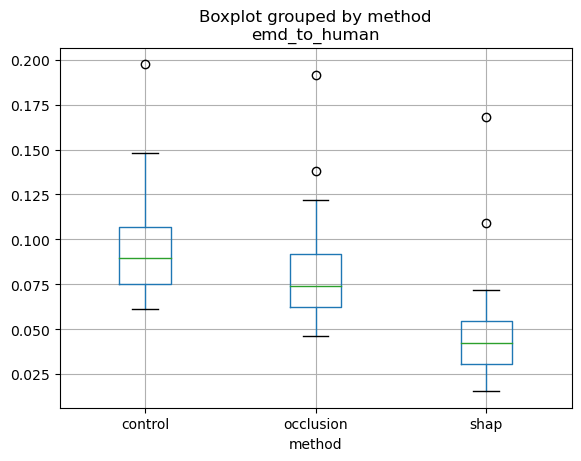

In [31]:
df5.boxplot(by="method", column = "emd_to_human")

In [32]:
for method in set(df5.method):
    print("\n\n",method)
    print(df5[df5['method']==method].emd_to_human.describe())



 shap
count    27.000000
mean      0.048848
std       0.030341
min       0.015495
25%       0.030746
50%       0.042465
75%       0.054353
max       0.168274
Name: emd_to_human, dtype: float64


 occlusion
count    27.000000
mean      0.082208
std       0.030949
min       0.046310
25%       0.062453
50%       0.073978
75%       0.092074
max       0.191279
Name: emd_to_human, dtype: float64


 control
count    27.000000
mean      0.093934
std       0.029168
min       0.061568
25%       0.074945
50%       0.089815
75%       0.106983
max       0.197531
Name: emd_to_human, dtype: float64


# Statistical analysis ANOVA (Repeated Measures)

In [33]:
!pip install statsmodels

In [34]:
from statsmodels.stats.anova import AnovaRM

print(AnovaRM(data=df5, depvar='emd_to_human',
              subject='id', within=['method'], aggregate_func = "mean").fit())

                Anova
       F Value  Num DF  Den DF Pr > F
-------------------------------------
method 122.7391 2.0000 28.0000 0.0000



# T-tests

In [48]:
!pip install scipy
from scipy.stats import ttest_rel



In [52]:
# average emd distances from the two maps in each case:



agg_shap_emd, agg_occlusion_emd, agg_control_emd = [],[],[]

# average the two maps for each movie
for i in range(15):
    agg_shap_emd.append((all_shap_human[i] + all_shap_human[i+15])/2)
    agg_occlusion_emd.append((all_occlusion_human[i] + all_occlusion_human[i+15])/2)
    agg_control_emd.append((all_human_control[i] + all_human_control[i+15])/2)
    

In [53]:
# test hypothesis that SHAP is closer to human maps than Occlusion
print("SHAP emd is less than Occlusion emd: p =", 
      ttest_rel(agg_shap_emd, agg_occlusion_emd, nan_policy = "omit", alternative = "less").pvalue)

SHAP emd is less than Occlusion emd: p = 2.8089250041210794e-08


In [54]:
# test hypothesis that Occlusion is closer to human maps than the control map:
print("Occlusion emd is less than control emd: p =", 
      ttest_rel(agg_occlusion_emd, agg_control_emd, nan_policy = "omit", alternative = "less").pvalue)

SHAP emd is less than Occlusion emd: p = 3.8496665962787343e-07


In [55]:
# test hypothesis that SHAP is closer to human maps than the contro map
print("SHAP emd is less than control emd: p =", 
      ttest_rel(agg_shap_emd, agg_control_emd, nan_policy = "omit", alternative = "less").pvalue)

SHAP emd is less than control emd: p = 3.821627289927749e-09
